In [2]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE
from MDAnalysis.analysis import hole2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
##u = mda.Universe("files/07_equil_74_ions_sodium.psf", "/Volumes/SSD/Cldn-15_reduce_model/NPT_run/RM_74ions_Na_105ns.dcd", in_memory=True, in_memory_step=1)b

In [104]:
u = mda.Universe("files/07_equil_74_ions_sodium.psf", "/Volumes/SSD/Cldn-15_reduce_model/NPT_run/RM_74ions_Na_105ns.dcd", in_memory=True, in_memory_step=30)

In [105]:
u.trajectory

<MemoryReader with 434 frames of 58580 atoms>

In [49]:
##u = mda.Universe("/Volumes/SSD/Cldn-15_reduce_model/files/07_equil_74_ions_sodium.psf", ["/Volumes/SSD/Cldn-15_reduce_model/NPT_run/RM_74ions_Na_105ns.dcd"])
##protein = u.select_atoms("protein")
##with mda.Writer("/Volumes/SSD/Cldn-15_reduce_model/NPT_run/new_100ns_1ns.dcd", n_atoms=u.atoms.n_atoms) as W:
##    for ts in u.trajectory[3000:4000:1]: 
##     W.write(u.atoms)
##    print(ts.frame)

0


In [52]:
##u1 = mda.Universe("files/07_equil_74_ions_sodium.psf", "/Volumes/SSD/Cldn-15_reduce_model/NPT_run/new_100ns_1ns.dcd", in_memory=True, in_memory_step=2)

In [59]:
##u1.trajectory

NameError: name 'u1' is not defined

In [106]:
ha = hole2.HoleAnalysis(u, select='protein', cpoint= [-1.6432, 21.024, -1.827], cvect= [1,0,0], executable='/Users/sukanyakonar/Downloads/hole2-master/exe/hole', sample=0.27, end_radius=22.0, vdwradii_file=None)
ha.run(random_seed=31415)

/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/analysis/hole2/hole.py:725: DeprecationWarning: The `sphpdbs` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.sphpdbs` instead.
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/analysis/hole2/hole.py:733: DeprecationWarning: The `outfiles` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.outfiles` instead.
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no informa

In [107]:
gathered = ha.gather()
print(gathered.keys())

dict_keys(['rxn_coord', 'radius', 'cen_line_D'])


In [108]:
print(len(gathered['rxn_coord']))

434


In [109]:
gathered['rxn_coord']

[array([-4.59232e+01, -4.57882e+01, -4.56532e+01, -4.55182e+01,
        -4.53832e+01, -4.52482e+01, -4.51132e+01, -4.49782e+01,
        -4.48432e+01, -4.47082e+01, -4.45732e+01, -4.44382e+01,
        -4.43032e+01, -4.41682e+01, -4.40332e+01, -4.38982e+01,
        -4.37632e+01, -4.36282e+01, -4.34932e+01, -4.33582e+01,
        -4.32232e+01, -4.30882e+01, -4.29532e+01, -4.28182e+01,
        -4.26832e+01, -4.25482e+01, -4.24132e+01, -4.22782e+01,
        -4.21432e+01, -4.20082e+01, -4.18732e+01, -4.17382e+01,
        -4.16032e+01, -4.14682e+01, -4.13332e+01, -4.11982e+01,
        -4.10632e+01, -4.09282e+01, -4.07932e+01, -4.06582e+01,
        -4.05232e+01, -4.03882e+01, -4.02532e+01, -4.01182e+01,
        -3.99832e+01, -3.98482e+01, -3.97132e+01, -3.95782e+01,
        -3.94432e+01, -3.93082e+01, -3.91732e+01, -3.90382e+01,
        -3.89032e+01, -3.87682e+01, -3.86332e+01, -3.84982e+01,
        -3.83632e+01, -3.82282e+01, -3.80932e+01, -3.79582e+01,
        -3.78232e+01, -3.76882e+01, -3.7

In [110]:
flat = ha.gather(flat=True)
print(len(flat['rxn_coord']))

300376


In [111]:
radii, edges = ha.bin_radii(bins=100, range=None)
means, edges = ha.histogram_radii(bins=100, range=None, aggregator=np.mean)

Text(0.5, 0, 'Pore coordinate $\\zeta$ ($\\AA$)')

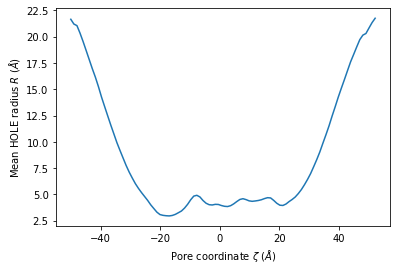

In [112]:
midpoints = 0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints, means)
plt.ylabel(r"Mean HOLE radius $R$ ($\AA$)")
plt.xlabel(r"Pore coordinate $\zeta$ ($\AA$)")

In [113]:
dat = np.array([midpoints, means])
dat = dat.T
np.savetxt('data_test_hole1_0.27_105ns.txt', dat)

In [114]:
ha.delete_temporary_files()
ha.tmp_files

[]